In [1]:
from dreimac import CircularCoords, ToroidalCoords
from dreimac.utils import GeometryExamples, PlotUtils, CircleMapUtils

import matplotlib.pyplot as plt
import gudhi

%load_ext autoreload
%autoreload 2

### Trefoil Knot
The purpose of this notebook is to show how the twisted geometry of the trefoil knot can lead to some strange results with circular coordinates if parameters aren't chosen carefully.
In particular, a coverage that is too large leads to strange results.
On the other hand, for the same representative cocycle, a coverage which is small, but not too small, leads to good results.

In [2]:
X = GeometryExamples.trefoil(n_samples = 2500, horizontal_width=10)

/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:81: UserWarning: There are 252 intervals given as input, whereas max_intervals is set to 5.
  warnings.warn(


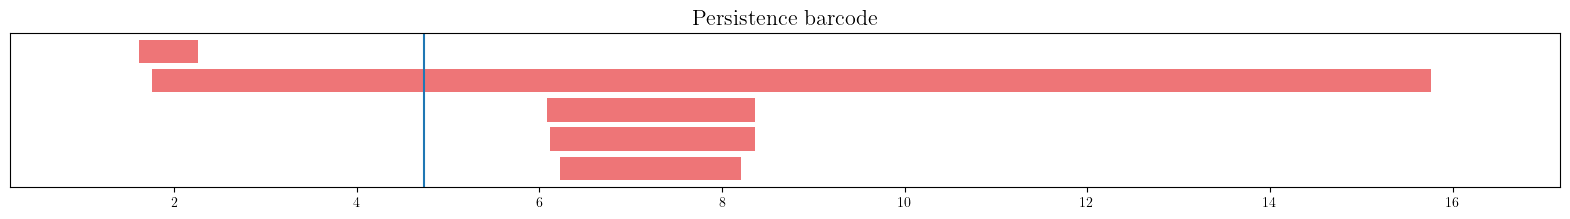

In [4]:
prime = 41
large_perc = 0.1
cohomology_class_index = 0

cc = CircularCoords(X, 500, prime=prime)
circular_coords = cc.get_coordinates(perc=large_perc, cohomology_class=cohomology_class_index, check_and_fix_cocycle_condition =False)

pd = cc.dgms_[1]
fig = plt.figure(figsize=(20,2))
_ = gudhi.plot_persistence_barcode(pd, max_intervals=5, axes=fig.gca() )
plt.axvline(x=cc.threshold_)
plt.axvline(x=cc.coverage_, c="red")

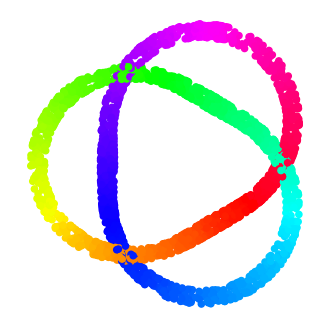

In [15]:
PlotUtils.plot_2d_scatter_with_different_colorings(
    X,
    [circular_coords],
    point_size=20,
    cmap="hsv",
)

In [10]:
prime = 3
large_perc = 0.8

cc = CircularCoords(X, 300, prime=prime)
circular_coords_large_perc_fixed = cc.get_coordinates(perc=large_perc, cohomology_class=cohomology_class_index)
circular_coords_large_perc_not_fixed = cc.get_coordinates(perc=large_perc, cohomology_class=cohomology_class_index, check_and_fix_cocycle_condition=False)

number of faces:  222524
failure: 179.47423213375228
fixed failure: 0.0


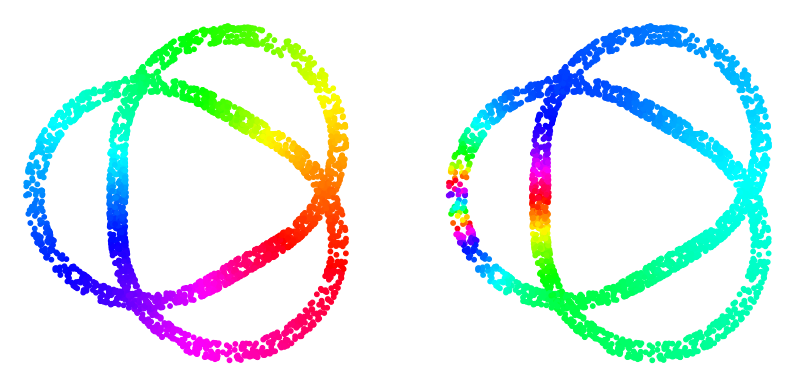

In [11]:
PlotUtils.plot_2d_scatter_with_different_colorings(
    X,
    [circular_coords_large_perc_fixed, circular_coords_large_perc_not_fixed],
    point_size=10,
    cmap="hsv",
)